In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# TODO Take the dash out of the name to avoid this hackery
import importlib  
rq = importlib.import_module("range-query")

In [3]:
adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

In [4]:
lst = rq.build_tree(0, 100)
df = adult['Age']
tree=rq.counts(lst,df)
noisy_tree = rq.noisy_counts(tree, 1.0)

In [5]:
def create_workload(low: int, high: int, n: int) -> list[(int, int)]:
    result = []
    for _ in range(n):
        a = np.random.randint(low, high)
        result.append((a, np.random.randint(a, high)))

    return result

In [6]:
def control_query(series: pd.Series, a: int, b: int, epsilon: float) -> int:
    np.sum(series)

In [8]:
workloads = create_workload(0, 100, 50)

C:\Users\omara\PycharmProjects\dp-range-query\range-query.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)


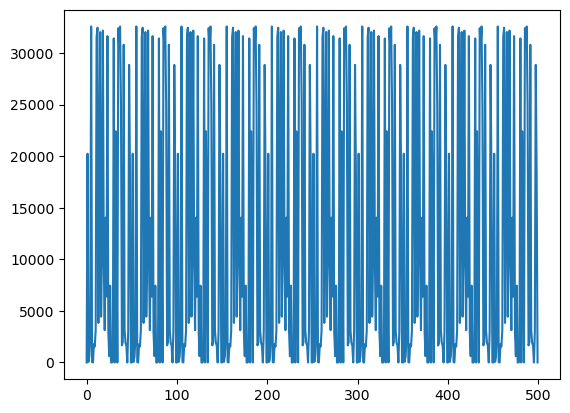

In [25]:
lst = rq.build_tree(0, 100)
df = adult['Age']
lst=rq.counts(lst,df)
pl=[]
epsilons=rq.epsilon_gen(10)
for epsilon in epsilons:
    for workload in workloads:    
        noisy_tree=rq.noisy_counts(lst,epsilon)        
        pl.append(rq.query(noisy_tree, workload[0], workload[1]))
        
plt.plot(pl)